## Random Forest Regression


Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine',
       'Power', 'Seats', 'New_Price', 'Price', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')
Mean Squared Error on Testing Data: 16.841470015030286


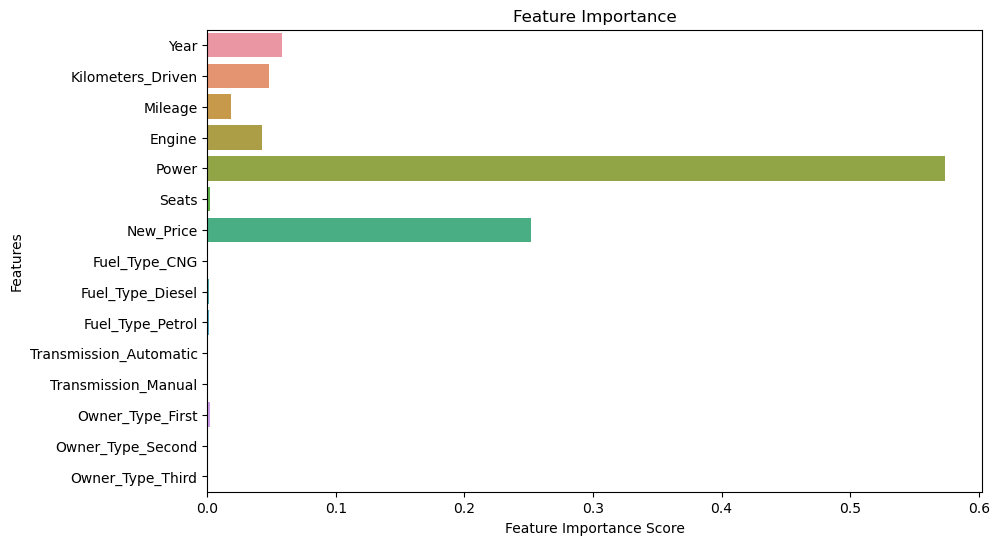

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Step 2: Preprocess the data
imputer = SimpleImputer(strategy='mean')

# Convert 'New_Price' to float after removing non-numeric characters
df['New_Price'] = df['New_Price'].str.replace(' Lakh', '').str.replace(' Cr', '').astype(float)
df = df.dropna(subset=['New_Price'])
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type'])
print(df.columns)
# Step 3: Train-test split (80-20 ratio)
X = df.drop(['Name', 'Price', 'Location',], axis=1)
#X = df[['Engine', 'Mileage', 'Power']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 5: Predict prices for testing data
predicted_prices_test = rf_regressor.predict(X_test)

# Step 6: Evaluate model performance on testing data
mse_test = mean_squared_error(y_test, predicted_prices_test)
print("Mean Squared Error on Testing Data:", mse_test)

# Step 7: Visualize feature importance
feature_importance = pd.Series(rf_regressor.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()





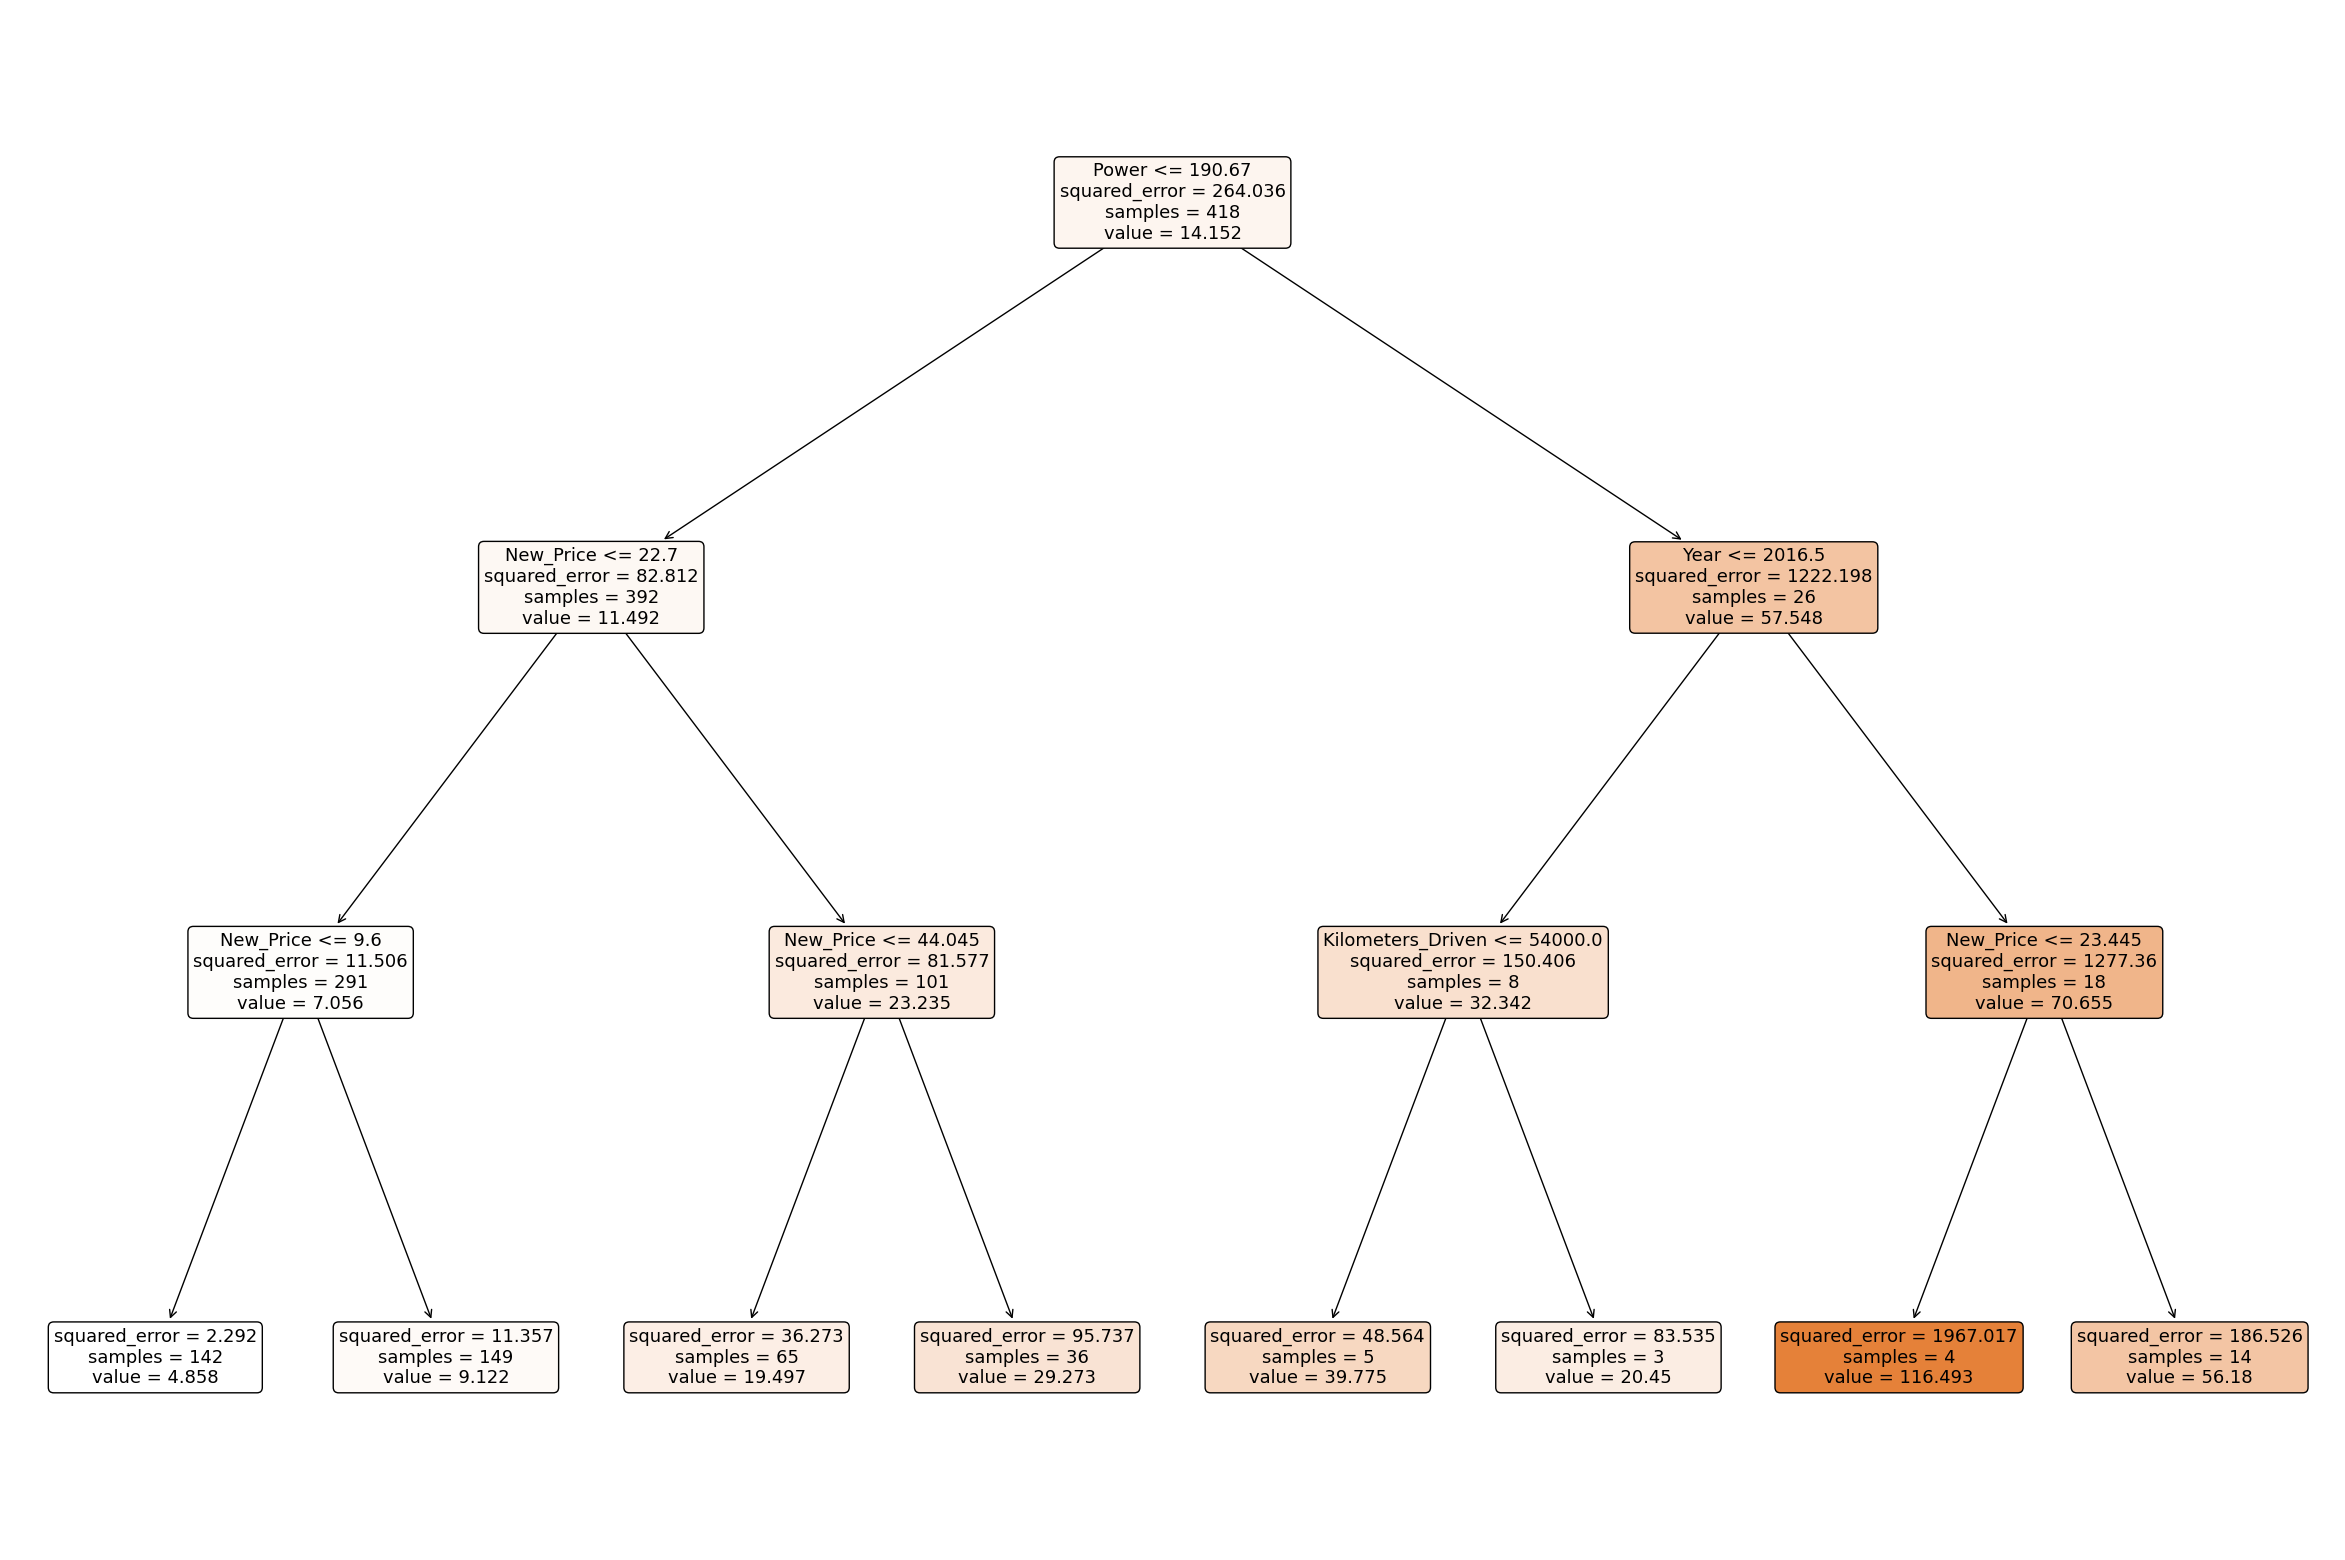

In [16]:
from sklearn.tree import plot_tree
# Step 4: Train the model with a limited max_depth
rf_regressor = RandomForestRegressor(max_depth=3, random_state=42)
rf_regressor.fit(X_train, y_train)

# Extract the first tree from the Random Forest
first_tree = rf_regressor.estimators_[0]

# Plot the first tree
plt.figure(figsize=(30, 20))
plot_tree(first_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

## this is for the slides 

Limiting the max_depth parameter affects the depth of individual decision trees in the random forest. Here's how it affects the model:

Tree Complexity: By setting a maximum depth, you are controlling the complexity of each decision tree in the random forest. A smaller max_depth value means shallower trees with fewer decision nodes, resulting in simpler models.

Model Complexity: Since random forests consist of multiple decision trees, limiting the depth of each tree also limits the overall complexity of the random forest model. This can help prevent overfitting and improve generalization to unseen data.

Training Time: Smaller trees with limited depth tend to require less computational resources and training time compared to deeper trees. By reducing the complexity of individual trees, training the random forest model may become faster.

Interpretability: Shallower trees are easier to interpret and visualize, as they have fewer levels and nodes. This can be beneficial for understanding the underlying decision-making process of the model and communicating the model's behavior to stakeholders.

Overall, controlling the max_depth parameter allows you to balance model complexity, interpretability, and computational resources based on the specific requirements of your problem. 

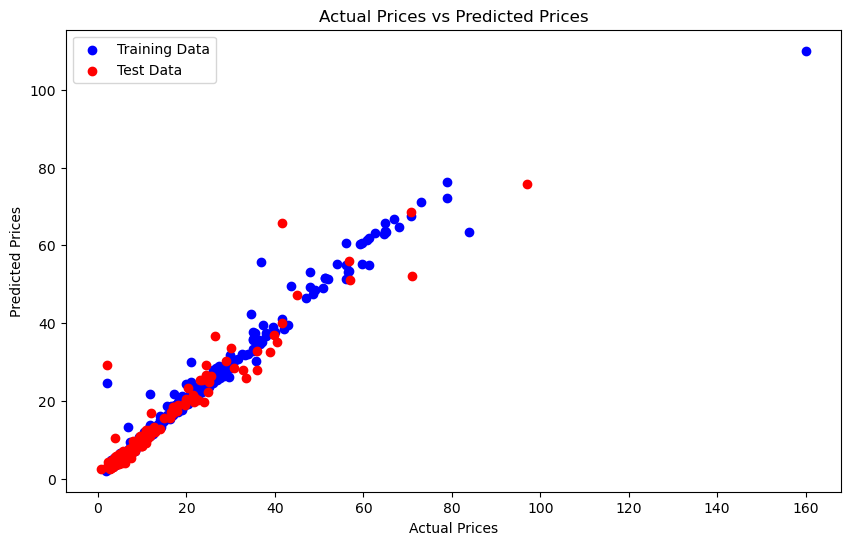

In [2]:
# Step 8: Visualize predicted prices against actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_train, rf_regressor.predict(X_train), color='blue', label='Training Data')
plt.scatter(y_test, predicted_prices_test, color='red', label='Test Data')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

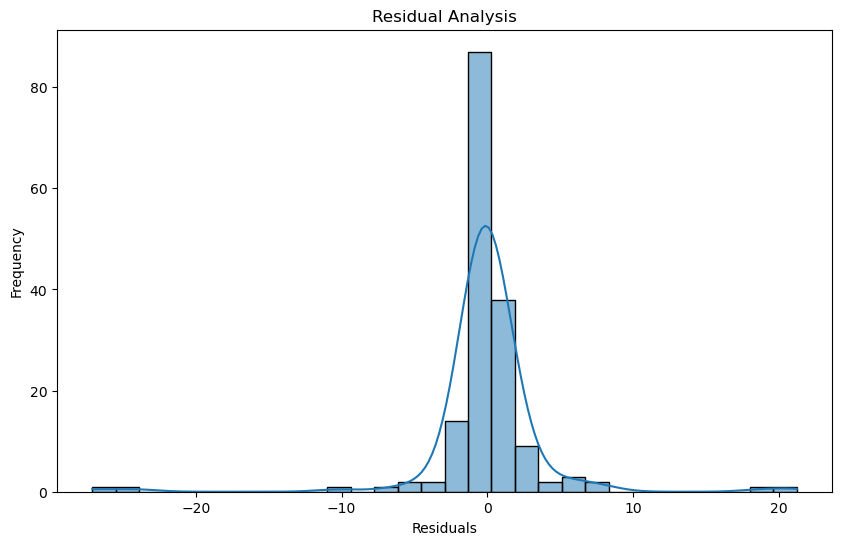

In [3]:
# Step 9: Residual Analysis
residuals = y_test - predicted_prices_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Analysis')
plt.show()

In [4]:
from scipy import stats
anderson_test = stats.anderson(residuals, dist='norm')
print("\nAnderson-Darling Test:")
print("Test Statistic:", anderson_test.statistic)
print("Critical Values:", anderson_test.critical_values)
print("Significance Levels:", anderson_test.significance_level)



Anderson-Darling Test:
Test Statistic: 21.16187478416188
Critical Values: [0.563 0.641 0.769 0.897 1.067]
Significance Levels: [15.  10.   5.   2.5  1. ]


## Gradient Boosting
for zk

### Gradient Boosting and Random Forest are both ensemble learning techniques used for regression and classification tasks, but they differ in several key aspects:

Model Architecture:
Random Forest: It consists of a collection of decision trees where each tree is built independently and does not depend on the output of other trees.
Gradient Boosting: It builds trees sequentially, where each tree corrects the errors of the previous one. The next tree focuses on the residuals (errors) of the previous tree.
Training Process:
Random Forest: Trees are built independently and in parallel. Each tree is trained on a bootstrap sample of the data and makes splits based on a random subset of features.
Gradient Boosting: Trees are built sequentially, with each tree trying to correct the errors made by the previous trees. It minimizes a loss function (e.g., mean squared error for regression) by adding trees that reduce the residual error.
Tree Selection:
Random Forest: Random forest selects the best split among a random subset of features at each node, aiming to reduce variance.
Gradient Boosting: Gradient boosting uses a gradient descent optimization algorithm to minimize the loss function by adding trees that reduce the error gradient, aiming to reduce bias.
Regularization:
Random Forest: It typically relies on bagging and random feature selection for regularization.
Gradient Boosting: It employs techniques like shrinkage (learning rate) and tree depth constraints to prevent overfitting.
Prediction:
Random Forest: Predictions are made by averaging the predictions of all the trees in the forest for regression or by voting for classification.
Gradient Boosting: Predictions are made by summing the predictions of all the trees, with each tree's contribution weighted by a learning rate.
Interpretability:
Random Forest: It can be less interpretable due to the large number of trees and random feature selection.
Gradient Boosting: It can be more interpretable because the model sequentially learns from its mistakes, allowing for a clearer understanding of the relationships between features and the target.
Robustness to Noisy Data:
Random Forest: It can handle noisy data and outliers well due to averaging multiple trees.
Gradient Boosting: It can be sensitive to noisy data, as it tries to fit the errors made by the previous trees.
In summary, while both Gradient Boosting and Random Forest are powerful ensemble methods, they have different approaches to building and combining decision trees, which results in variations in performance, interpretability, and robustness to different types of data. The choice between them depends on the specific characteristics of the dataset and the goals of the analysis.

Mean Squared Error on Testing Data (Gradient Boosting): 17.597939692425765


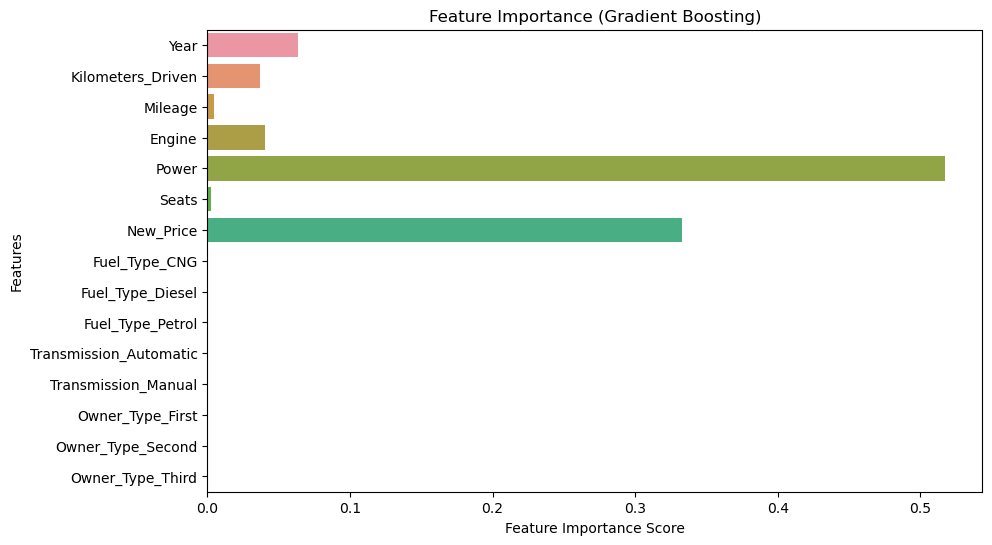

In [19]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Step 2: Preprocess the data
imputer = SimpleImputer(strategy='mean')

# Convert 'New_Price' to float after removing non-numeric characters
df['New_Price'] = df['New_Price'].str.replace(' Lakh', '').str.replace(' Cr', '').astype(float)
df = df.dropna(subset=['New_Price'])
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type'])

# Step 3: Train-test split (80-20 ratio)
X = df.drop(['Name', 'Price', 'Location',], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model (Gradient Boosting)
gb_regressor = GradientBoostingRegressor(random_state=42)  # Use GradientBoostingRegressor
gb_regressor.fit(X_train, y_train)

# Step 5: Predict prices for testing data
predicted_prices_test = gb_regressor.predict(X_test)

# Step 6: Evaluate model performance on testing data
mse_test = mean_squared_error(y_test, predicted_prices_test)
print("Mean Squared Error on Testing Data (Gradient Boosting):", mse_test)

# Step 7: Visualize feature importance
feature_importance = pd.Series(gb_regressor.feature_importances_, index=X_train.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()



The MSE of 22.54 suggests that, on average, the squared difference between the predicted prices and the actual prices in the testing dataset is approximately 22.54. Lower values of MSE are generally desirable, indicating better predictive performance of the model. However, the interpretation of MSE can vary depending on the scale and context of the target variable.



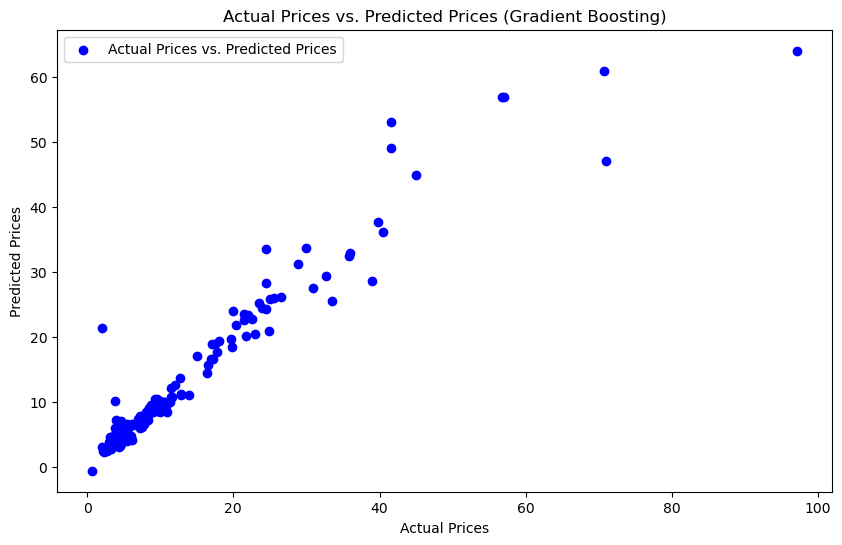

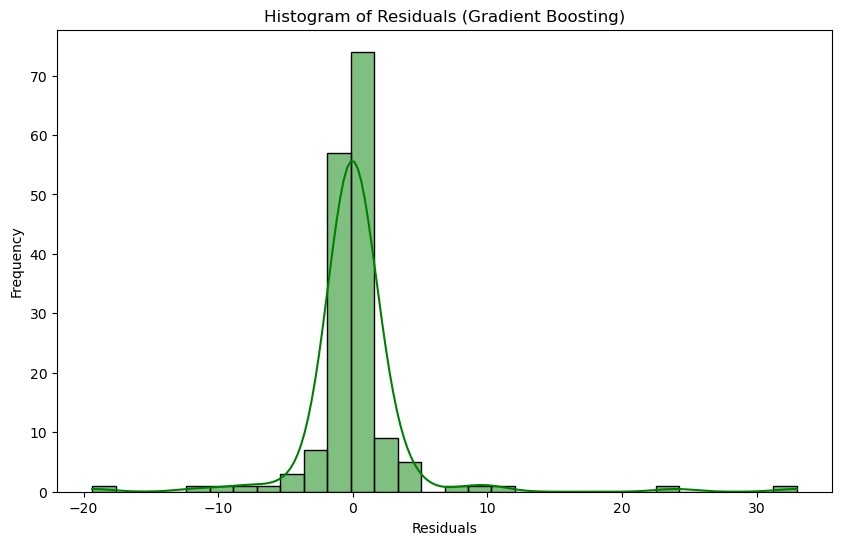

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual prices vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_prices_test, color='blue', label='Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Gradient Boosting)')
plt.legend()
plt.show()

# Plot residuals
residuals = y_test - predicted_prices_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Gradient Boosting)')
plt.show()


## Support Vector Regression (SVR)


Mean Squared Error on Testing Data (SVR): 52940.04807056306


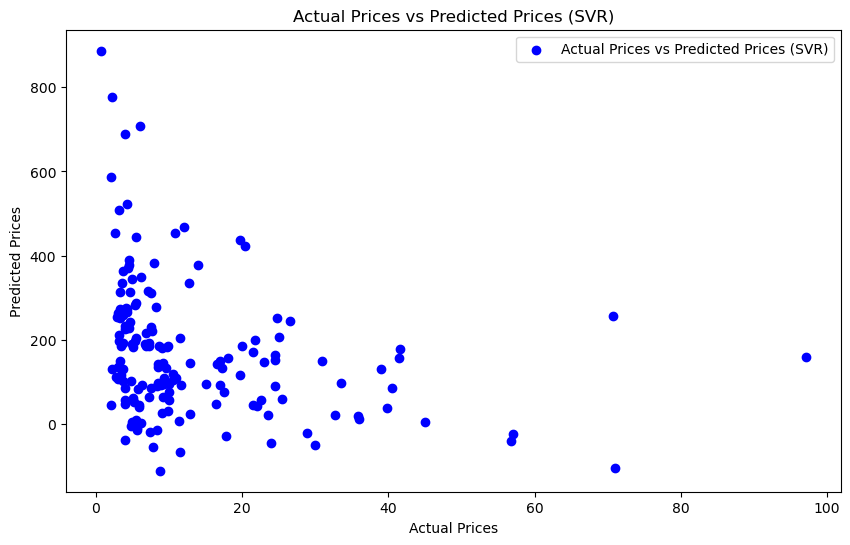

In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR  # Import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Step 2: Preprocess the data
imputer = SimpleImputer(strategy='mean')

# Convert 'New_Price' to float after removing non-numeric characters
df['New_Price'] = df['New_Price'].str.replace(' Lakh', '').str.replace(' Cr', '').astype(float)
df = df.dropna(subset=['New_Price'])
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type'])

# Step 3: Train-test split (80-20 ratio)
X = df.drop(['Name', 'Price', 'Location'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model - SVR
svr_regressor = SVR(kernel='linear')  # Choose linear kernel for simplicity
svr_regressor.fit(X_train, y_train)

# Step 5: Predict prices for testing data
predicted_prices_test = svr_regressor.predict(X_test)

# Step 6: Evaluate model performance on testing data
mse_test = mean_squared_error(y_test, predicted_prices_test)
print("Mean Squared Error on Testing Data (SVR):", mse_test)

# Step 7: Visualize feature importance (Not applicable for SVR)
# Feature importance is not directly available for SVR, as it doesn't provide coefficients like linear regression

# Additional step: Visualize actual prices vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_prices_test, color='blue', label='Actual Prices vs Predicted Prices (SVR)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices (SVR)')
plt.legend()
plt.show()


Comparing the Mean Squared Error (MSE) values:

MSE on Testing Data (Gradient Boosting): 17.597939692425765
MSE on Testing Data (Random Forest): 16.841470015030286
MSE on Testing Data (SVR): 52940.04807056306
We can make the following analysis:

Gradient Boosting and Random Forest have significantly lower MSE values compared to SVR. This indicates that both Gradient Boosting and Random Forest models perform much better than the SVR model in terms of predicting prices on the testing dataset.
Gradient Boosting has a slightly higher MSE than Random Forest, but the difference is not substantial. Both models seem to perform similarly, but Random Forest has a slightly better performance based on the MSE metric.
The SVR model has a very high MSE compared to Gradient Boosting and Random Forest. This suggests that the SVR model might not be suitable for this particular dataset or might require further tuning to improve its performance.
In summary, based on the MSE metric, Gradient Boosting and Random Forest models outperform the SVR model in predicting prices on the testing dataset, with Random Forest showing slightly better performance than Gradient Boosting.